#**Preprocessing**

In [ ]:
import pandas as pd
data = pd.read_csv('nyc-rolling-sales.csv')
data["SALE PRICE"] = pd.to_numeric(data["SALE PRICE"], errors='coerce')
data_cleaned = data.dropna(subset=["SALE PRICE"])

# **Mean**

In [5]:
rata_rata = data_cleaned["SALE PRICE"].mean()
rata_rata

1276456.4977638705

*Menghitung rata-rata (mean) dari kolom "SALE PRICE"*

# **Median**

In [6]:
median = data_cleaned["SALE PRICE"].median()
median

530000.0

*Menghitung median dari kolom "SALE PRICE"*

# **Modus**

In [9]:
modus = data_cleaned["SALE PRICE"].mode().iloc[0]
modus

0.0

*Menghitung modus dari kolom "SALE PRICE"*

# **Range**

In [10]:
rentang = data_cleaned["SALE PRICE"].max() - data_cleaned["SALE PRICE"].min()
rentang

2210000000.0

*Menghitung rentang (range) dari kolom "SALE PRICE"*

# **Variance**

In [12]:
variance = data_cleaned["SALE PRICE"].var()
variance

130079849507172.7

*Menghitung varians dari kolom "SALE PRICE"*

# **SD**

In [13]:
std_dev = data_cleaned["SALE PRICE"].std()
std_dev

11405255.345987337

*Menghitung standar deviasi (SD) dari kolom "SALE PRICE"*

# **Analisa Distribusi Data**

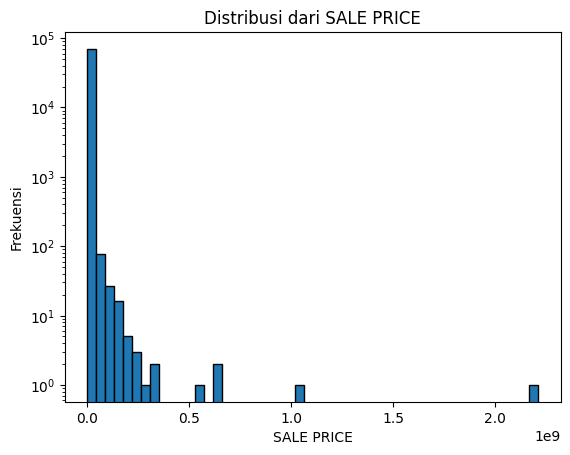

In [16]:
import matplotlib.pyplot as plt
plt.hist(data_cleaned["SALE PRICE"], bins=50, edgecolor='black')
plt.title('Distribusi dari SALE PRICE')
plt.xlabel('SALE PRICE')
plt.ylabel('Frekuensi')
plt.yscale('log')
plt.show()

*Kesimpulannya, pasar properti di NYC memiliki sejumlah besar properti dengan harga jual yang relatif terjangkau (dibandingkan dengan harga jual tertinggi dalam dataset), tetapi ada beberapa properti dengan harga jual yang sangat tinggi yang membuat distribusi menjadi condong ke kanan.*

# **Confidence Intervals**

In [21]:
from scipy import stats
confidence_level = 0.95
degrees_freedom = data_cleaned["SALE PRICE"].count() - 1
CI = stats.t.interval(confidence_level, degrees_freedom, rata_rata, std_dev / (data_cleaned["SALE PRICE"].count()**0.5))
CI

(1191957.4283848696, 1360955.5671428714)

*Kode di atas menentukan tingkat kepercayaan yang ingin kita gunakan, yaitu 95%. Ini berarti kita ingin memiliki kepercayaan 95% bahwa rata-rata sebenarnya berada dalam interval yang kita hitung. Derajat kebebasan (degrees of freedom) dihitung dengan mengambil jumlah observasi (dalam hal ini jumlah harga jual) dikurangi satu. Ini digunakan ketika kita menghitung interval kepercayaan dengan distribusi t. Kode di atas menghitung interval kepercayaan untuk rata-rata harga jual dengan tingkat kepercayaan 95%. Fungsi stats.t.interval dari pustaka scipy.stats digunakan untuk menghitung interval kepercayaan dengan distribusi t.*

# **Hipotesis**

In [23]:
pop_mean = 1300000
t_stat, p_val = stats.ttest_1samp(data_cleaned["SALE PRICE"], pop_mean)
p_val_one_sided = p_val / 2
if p_val_one_sided < 0.05:
    kesimpulan = "Rata-rata harga jual properti di NYC lebih besar dari $1,300,000."
else:
    kesimpulan = "Tidak ada bukti cukup untuk mengatakan rata-rata harga jual properti di NYC lebih besar dari $1,300,000."
kesimpulan

'Tidak ada bukti cukup untuk mengatakan rata-rata harga jual properti di NYC lebih besar dari $1,300,000.'

*Uji hipotesis: Apakah rata-rata harga jual properti di NYC lebih besar dari $1,300,000?*